In [20]:
# import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from kneed import KneeLocator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# import umap
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import umap.umap_ as umap
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
# from tqdm import tqdm 

In [4]:
# # !pip uninstall umap -force
# !pip install umap-learn

In [13]:
# def get_best_principle_component_for_PCA(trans_df,pca_threshold):
#     # Initialize PCA
#     pca = PCA()
    
#     # Fit PCA
#     X_pca = pca.fit_transform(trans_df)
    
#     plt.figure(figsize=(12, 6))

#     # Plot cumulative explained variance
#     cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
#     n_pc = len(cumulative_variance[cumulative_variance<= pca_threshold])

#     plt.subplot(1, 2, 2)
#     plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
#     plt.axhline(y=0.95, color='r', linestyle='--')
#     plt.xlabel('Number of Principal Components')
#     plt.ylabel('Cumulative Explained Variance')
#     plt.title('Cumulative Explained Variance Plot')

#     plt.tight_layout()
#     plt.show()
#     return n_pc

# n_pc = get_best_principle_component_for_PCA(trans_df,0.95)

# n_pc

# reduced_df = PCA(n_components=n_pc).fit_transform(trans_df)

# def get_optimal_k_elbow_plot(reduced_df):
#     print('Entered the elbow_plot method of the KMeansClustering class')
#     wcss=[] # initializing an empty list
#     for i in range (4,11):
#         kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
#         kmeans.fit(trans_df) # fitting the data to the KMeans Algorithm
#         wcss.append(kmeans.inertia_)
#     plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
#     plt.title('The Elbow Method')
#     plt.xlabel('Number of clusters')
#     plt.ylabel('WCSS')
#     #plt.show()
#     # plt.savefig('preprocessing_data/K-Means_Elbow.PNG') # saving the elbow plot locally
#     # finding the value of the optimum cluster programmatically
#     kn = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
#     return kn.knee

# # min max range for cluster between 4 and 10
# # Different method to identify the cluster number from elbow 

# number_of_clusters = get_optimal_k_elbow_plot(reduced_df)


# number_of_clusters


# print('Entered the create_clusters method of the KMeansClustering class')
# kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', random_state=42)
# y_kmeans=kmeans.fit_predict(reduced_df) #  divide data into clusters
# df['Cluster']=y_kmeans  # create a new column in dataset for storing the cluster information)


# df['Cluster'].value_counts()

# plt.figure(figsize = (20,10))
# plt.scatter(df[df['Cluster' == 0],0],df[df['Cluster' == 0],1],s = 50, c = 'green', label = "High income - Less spending")
# # plt.scatter(df[Cluster == 1,0],df[Cluster == 1,1],s = 50, c = 'blue', label = "medium income - medium spending")
# # plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
# plt.xlabel("Anual income(k$) -- >")
# plt.ylabel("spending score out of 100 -- >")
# plt.legend()
# plt.show()

# df.columns



# pca.explained_variance_[8]

# best_eig_pairs = [sorted_eig_pairs[i][0] for i in range(0, len(sorted_eig_pairs)) if sorted_eig_pairs[i][0] > 1.0]
# print("\nAccording to Kaiser's Stopping Rule :")
# print("Number of PCs to be considered for PCA is : {}".format(str(len(best_eig_pairs))))
# print("Their Eigenvalues are : {}".format(str(best_eig_pairs)))

# cumulative_variance



# ## Variance INflation method
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()

# vif_data["feature"] = trans_df.columns

# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(trans_df.values, i)
#                           for i in range(len(trans_df.columns))]

# print(vif_data.sort_values('VIF',ascending=False))






# def computeCovarianceMatrix(data):
#     len_data = data.shape[0]
#     covariance = data.T.dot(data)/len_data
#     return covariance

# cov_mat = computeCovarianceMatrix(trans_df)   # or scaled_df.cov()
# cov_mat = np.around(cov_mat,3)
# cov_mat

# import seaborn as sn


# '''Now, Plotting the Covariance Matrix as Heatmap'''

# fig = plt.figure(figsize=(16,7))
# '''Annotate each cell with the numeric value using integer formatting'''
# sn.heatmap(cov_mat, annot=True, fmt='g', linewidths=.1, cmap="YlGnBu")    
# plt.show()

In [14]:
# Dimension reduction class
class dimension_redution_optimiser:
    def __init__(self, data):
        self.data = data
        self.pca_threshold = 0.95
        self.tsne_min_components = 2
        self.tsne_max_components = 3
        self.umap_min_components = 2
        self.umap_max_components = 10
          
    def pca_n_components_optimizer(self):
        print('  ** Selecting best N component for PCA')
        # Initialize PCA
        pca = PCA()

        # Fit PCA
        X_pca = pca.fit_transform(self.data)
        cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
        self.best_n_components = len(cumulative_variance[cumulative_variance <=  self.pca_threshold]) #select PC covers 95variance
        print(f'  ** best N component: {self.best_n_components}')
         
    

    def tsne_n_components_optimizer(self):
        print('  ** Selecting best N component for TSNE')
        
        best_n_components = None
        best_score = -1

        for n_components in range(self.tsne_min_components, self.tsne_max_components + 1):
            tsne = TSNE(n_components=n_components)
            transformed_data = tsne.fit_transform(self.data)
#             print(n_components)
            
            # Example with KMeans clustering (can replace with other methods)
            kmeans = KMeans(n_clusters=4)
            kmeans.fit(transformed_data)
            labels = kmeans.labels_
            
            if(len(set(labels))>1):
                score = silhouette_score(transformed_data, labels)
                if score > best_score:
                    best_score = score
                    best_n_components = n_components
        self.best_n_components = best_n_components
        print(f'  ** best N component: {self.best_n_components}')
        

        
    
    
    def umap_n_components_optimizer(self):
        print('  ** Selecting best N component for UMAP')
        
        
        best_n_components = None
        best_score = -1

        for n_components in range(self.umap_min_components, self.umap_max_components + 1):
#             print(n_components)
            reducer = umap.UMAP(n_components=n_components)
            reduced_data = reducer.fit_transform(self.data)
            
            # Example with KMeans clustering (can replace with other methods)
            kmeans = KMeans(n_clusters=4)
            kmeans.fit(reduced_data)
            labels = kmeans.labels_
            if(len(set(labels))>1):
                score = silhouette_score(reduced_data, labels)
                if score > best_score:
                    best_score = score
                    best_n_components = n_components

        self.best_n_components = best_n_components
        print(f'  ** best N component: {self.best_n_components}')
        

In [15]:
# Class to fetch the best n_cluster parameter for the clustering models

class clustering_model_optimizer:
    def __init__(self, data):
        self.data = data
        self.min_clusters = 4
        self.max_clusters = 10
        
        
    def kmeans_n_cluster_optimizer(self):
        print('  *** Entered the elbow_plot method of the KMeansClustering class')
        wcss=[] # initializing an empty list
        for i in range (self.min_clusters,self.max_clusters+1):
            kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
            kmeans.fit(self.data) # fitting the data to the KMeans Algorithm
            wcss.append(kmeans.inertia_)
        kn = KneeLocator(range(self.min_clusters,self.max_clusters+1), wcss, curve='convex', direction='decreasing')
        self.best_N_cluster =  kn.knee    

    def agglomerative_spectural_n_cluster_optimizer(self,model_name):
        score_dict = {'n_clusters':[],
                     'silhouette_score':[],
                     'DB_score':[]}

        for n_clusters in range( self.min_clusters, self.max_clusters + 1):
            if model_name == 'agglomerative':
                model = AgglomerativeClustering(n_clusters=n_clusters)
            elif model_name == 'spectral':
                print(n_clusters)
                model = SpectralClustering(n_clusters=n_clusters)
            else:
                raise ValueError('Unknown cluster model name')
                
            labels = model.fit_predict(self.data)
            silhouette_score_ = silhouette_score(self.data, labels)
            davies_bouldin_score_ = davies_bouldin_score(self.data, labels)
            score_dict['n_clusters'].append(n_clusters)
            score_dict['silhouette_score'].append(silhouette_score_)
            score_dict['DB_score'].append(davies_bouldin_score_)
        score_df = pd.DataFrame(score_dict).sort_values(['silhouette_score','DB_score'],ascending=[False, True])        
        self.best_N_cluster = score_df.n_clusters[0]
        
    def agglomerative_n_cluster_optimizer(self):
        self.agglomerative_spectural_n_cluster_optimizer(model_name='agglomerative')
    def spectral_n_cluster_optimizer(self):
        self.agglomerative_spectural_n_cluster_optimizer(model_name='spectral')

In [16]:
class best_clustering_model_selector:
    def __init__(self, df):
        print('-'*50)
        print('Data Loaded')
        self.data = df
        self.scalers = {
                        'normalization': MinMaxScaler(),
                        'standardization': StandardScaler()
                        }
        self.dimension_reduction={
                        'PCA': PCA(),
                        'UMAP':umap.UMAP(),
                        'TSNE': TSNE()
                        }

        self.clusters = {
                        'KMeans':KMeans(random_state=42),
                        'DBSCAN':DBSCAN(eps=0.5, min_samples=5),
                        'Agglomerative':AgglomerativeClustering(),
                        'Spectral':SpectralClustering(random_state=42)
                        }
        self.feature_engineering()
        
        
    def prepare_data_for_preprocessing(self):
    # Build preprocessing pipeline for categorical features
        print(self.data.shape)
        self.data.set_index('Customer ID',inplace=True)
        print(self.data.shape)
        
        one_hot_cat_col = []
        ordinal_cat_col = []
        # creating dummies
        numerical_features = self.data.select_dtypes(include=['int64', 'float64']).columns
        categorical_features = self.data.select_dtypes(include=['object']).columns
        for feature in categorical_features:
            unique_values = self.data[feature].nunique()
            if unique_values < 4:
                one_hot_cat_col.append(feature)
            else:
                ordinal_cat_col.append(feature)
        self.one_hot_cat_col = one_hot_cat_col
        self.ordinal_cat_col = ordinal_cat_col
        self.numerical_col = numerical_features
        
    def data_preprocess_pipeline(self):
        # Build preprocessing pipeline for numerical features
        print("** KNN imputer for missing values")
        numerical_pipeline = Pipeline(steps=[
            ('imputer', KNNImputer(n_neighbors=5)),
        #     ('scaler', MinMaxScaler())
        ])
        # Build preprocessing pipeline for categorical features
        print("** One hot encoding for the Categorical features with less than 4 unique values")
        
        onehot_categorical_pipeline = Pipeline(steps=[
            ('onehot_encoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))])
        
        print("** Ordinal encoding for the Categorical features with greater than 4 unique values")

        ordinal_categorical_pipeline = Pipeline(steps=[
            ('ordinal_encoding', OrdinalEncoder())

        ])
        column_transform = ColumnTransformer([
            ('numerical_columns', numerical_pipeline, self.numerical_col),
            ('onehot_categorical_columns', onehot_categorical_pipeline, self.one_hot_cat_col),
            ('ordinal_categorical_columns', ordinal_categorical_pipeline, self.ordinal_cat_col)   
        ])
        self.trans_df = pd.DataFrame(column_transform.fit_transform(self.data)) 
        one_hot_cols = list(onehot_categorical_pipeline.fit(self.data[self.one_hot_cat_col]).get_feature_names_out())   
        trans_cols = list(self.numerical_col)+one_hot_cols+list(self.ordinal_cat_col)  
        self.trans_df.columns = trans_cols 
        
        
    def remove_constant_multicolinear_feature(self):
        ### Removing constant features
        print('** Removing Constant features with 0 std')
        std_df = self.trans_df.describe().T['std']
        const_feature_list = list(std_df[std_df==0].index)
        if len(const_feature_list) > 0:
            self.trans_df.drop(const_feature_list,axis=1,inplace=True)

        ### Reducing number of features using correlation matrix 
        print('** Removing Multicolinear features')
        corr_mat = self.trans_df.corr().abs()
        upper_cor_mat_df = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(bool))
        drop_col = [col for col in upper_cor_mat_df.columns if any(upper_cor_mat_df[col] > 0.85)]

        self.data.reset_index(inplace=True)
        self.trans_df = pd.concat([self.data['Customer ID'],self.trans_df],axis=1)
        self.trans_df.drop(drop_col,axis=1,inplace=True)
#         self.trans_df.set_index('Customer ID',inplace=True)
        
    def feature_engineering(self):
        print('-'*50)
        print('Entering Data preprocessing ')
        self.prepare_data_for_preprocessing()
        print('--Column transformation')
        self.data_preprocess_pipeline()
        print('--Feature Removing')
        self.remove_constant_multicolinear_feature()
        
    def scaling_data(self,scaling_method):
        if scaling_method in self.scalers.keys():
            # Build preprocessing pipeline for numerical features
            print("** Scaling Numerical features")
            scaling_pipeline = Pipeline(steps=[('scaler', self.scalers[scaling_method])])
            temp_df = self.trans_df.drop(self.numerical_col,axis=1)
            column_transform = ColumnTransformer([('numerical_columns', scaling_pipeline, self.numerical_col)])
            self.scaled_df = pd.DataFrame(column_transform.fit_transform(self.trans_df))
            self.scaled_df.columns=self.numerical_col
            self.scaled_df = pd.concat([temp_df,self.scaled_df],axis=1)
            self.scaled_df.set_index('Customer ID',inplace=True)
            
        else:
            raise ValueError("Unknown Data Scaling method")
            
       
    
    def reduce_dimensions(self, dimension_method='PCA'):
        if dimension_method in self.dimension_reduction.keys():

            # Create an instance of the class
            n_comp_selector = dimension_redution_optimiser(self.scaled_df)

            # Construct the method name dynamically and call it
            method_name = f'{dimension_method.lower()}_n_components_optimizer'
            # Use getattr to call the method
            method = getattr(n_comp_selector, method_name, None)
            if method:
                method()  # Call the dynamically selected method
                self.dim_red_n_component = n_comp_selector.best_n_components
                self.reducer = self.dimension_reduction[dimension_method]
                self.reducer.n_components = self.dim_red_n_component
            else:
                raise ValueError(f"{method} not found")
            
        else:
            raise ValueError("Unknown dimensionality reduction method")
        
        self.reduced_df = self.reducer.fit_transform(self.scaled_df)
    
    
    
    
    def clustering_data(self, cluster_method='KMeans'):
        if cluster_method in self.clusters.keys():
            
            if cluster_method != 'DBSCAN':
                # Create an instance of the class
                n_cluster_selector = clustering_model_optimizer(self.reduced_df)

                # Construct the method name dynamically and call it
                method_name = f'{cluster_method.lower()}_n_cluster_optimizer'
                # Use getattr to call the method
                method = getattr(n_cluster_selector, method_name, None)
                if method:
                    method()  # Call the dynamically selected method
                    self.best_n_cluster = n_cluster_selector.best_N_cluster
                    self.clusterer = self.clusters[cluster_method]
                    self.clusterer.n_clusters = self.best_n_cluster
                else:
                    raise ValueError(f"{method} not found")
            elif cluster_method == 'DBSCAN':
                self.clusterer = self.clusters[cluster_method]
                
        else:
            raise ValueError("Unknown clustering method")
        if self.best_n_cluster != None:
            self.labels = self.clusterer.fit_predict(self.reduced_df)
        else:
            self.labels = []
        return self.labels
    
    def evaluate_clustering(self):
        silhouette = silhouette_score(self.reduced_df, self.labels)
        davies_bouldin = davies_bouldin_score(self.reduced_df, self.labels)
        return silhouette, davies_bouldin
    
    
    
    
    def compare_models(self, scaling_methods, dim_reduction_methods, clustering_methods):
        best_score = -float('inf')
        best_dim_red_method = None
        best_clustering_method = None
        best_labels = None
        best_X_reduced = None
        score_dict = {  'norma_method':[],
                        'dim_red_method':[],
                        'dim_red_n_component':[],
                        'clustering_method':[],
                        'clustering_n_clusters':[],
                        'silhouette_score':[],
                        'DB_score':[]}
        for scaling_method in scaling_methods:
            print('-'*50)
            print(scaling_method)
            self.scaling_data(scaling_method)

            for dim_red_method in dim_reduction_methods:
                print('*' * 50)
                print(f' --{dim_red_method}')

                self.reduce_dimensions(dimension_method=dim_red_method)
                for cluster_method in clustering_methods:
                    print(f'  ** Dimensionality Reduction: {dim_red_method}, Clustering: {cluster_method}')

                    self.clustering_data(cluster_method=cluster_method)
                    if len(set(self.labels)) >1:
                        silhouette, davies_bouldin= self.evaluate_clustering()

#                         print(f'Silhouette Score: {silhouette}')
#                         print(f'Davies-Bouldin Index: {davies_bouldin}')


                        score_dict['norma_method'].append(scaling_method)
                        score_dict['dim_red_method'].append(dim_red_method)
                        score_dict['dim_red_n_component'].append(self.dim_red_n_component)
                        score_dict['clustering_method'].append(cluster_method)
                        score_dict['clustering_n_clusters'].append(self.best_n_cluster)
                        score_dict['silhouette_score'].append(silhouette)
                        score_dict['DB_score'].append(davies_bouldin)



                        # Track the best configuration
                        score = silhouette  # Choose the metric to maximize, here we use silhouette score
                        if score > best_score:
                            best_score = score
                            best_dim_red_method = dim_red_method
                            best_clustering_method = cluster_method
                            best_labels = self.labels
                            best_X_reduced = self.reduced_df
                    else:
                        print('Unable to generate clusters')
                    
                    
        return best_dim_red_method, best_clustering_method, best_X_reduced, best_labels,score_dict
    
    def plot_clusters(self, X_reduced, labels, title='Cluster Plot'):
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis')
        plt.colorbar(scatter)
        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

In [17]:
df = pd.read_csv("data.csv")

In [18]:
import time

In [21]:
start = time.time()

# Define dimensionality reduction and clustering methods
scaling_methods = ['normalization', 'standardization']
dim_reduction_methods = ['PCA', 'UMAP', 'TSNE']
# clustering_methods = ['KMeans', 'DBSCAN', 'Agglomerative', 'Spectral']
clustering_methods = ['KMeans', 'DBSCAN', 'Agglomerative',]


# Create an instance of the class
# Load and preprocess data
model_selector = best_clustering_model_selector(df)
# Compare models
# model_selector.
best_dim_red, best_clustering, best_X_reduced, best_labels,score_dict = model_selector.compare_models(scaling_methods,dim_reduction_methods, clustering_methods)
end = time.time()


--------------------------------------------------
Data Loaded
--------------------------------------------------
Entering Data preprocessing 
(3900, 19)
(3900, 18)
--Column transformation
** KNN imputer for missing values
** One hot encoding for the Categorical features with less than 4 unique values
** Ordinal encoding for the Categorical features with greater than 4 unique values
--Feature Removing
** Removing Constant features with 0 std
** Removing Multicolinear features
--------------------------------------------------
normalization
** Scaling Numerical features
**************************************************
 --PCA
  ** Selecting best N component for PCA
  ** best N component: 3
  ** Dimensionality Reduction: PCA, Clustering: KMeans
  *** Entered the elbow_plot method of the KMeansClustering class
Unable to generate clusters
  ** Dimensionality Reduction: PCA, Clustering: DBSCAN
Unable to generate clusters
  ** Dimensionality Reduction: PCA, Clustering: Agglomerative
*******

In [22]:
(end-start )/60

16.944739353656768

In [23]:
d=pd.DataFrame(score_dict).sort_values(['silhouette_score','DB_score'],ascending=[False, True])

In [24]:
d

,norma_method,dim_red_method,dim_red_n_component,clustering_method,clustering_n_clusters,silhouette_score,DB_score
8,standardization,TSNE,2,KMeans,7,0.403958,0.778382
2,normalization,UMAP,2,Agglomerative,4,0.396635,0.807932
3,normalization,TSNE,2,KMeans,6,0.395260,0.808372
7,standardization,UMAP,2,Agglomerative,4,0.391937,0.740838
6,standardization,UMAP,2,KMeans,7,0.381979,0.806580
1,normalization,UMAP,2,KMeans,6,0.381180,0.889436
9,standardization,TSNE,2,Agglomerative,4,0.364186,0.865191
4,normalization,TSNE,2,Agglomerative,4,0.340968,0.861041
0,normalization,PCA,3,Agglomerative,4,0.226348,1.396072
5,standardization,PCA,3,Agglomerative,4,0.214523,1.485679


Best Dimensionality Reduction Method: TSNE
Best Clustering Method: KMeans


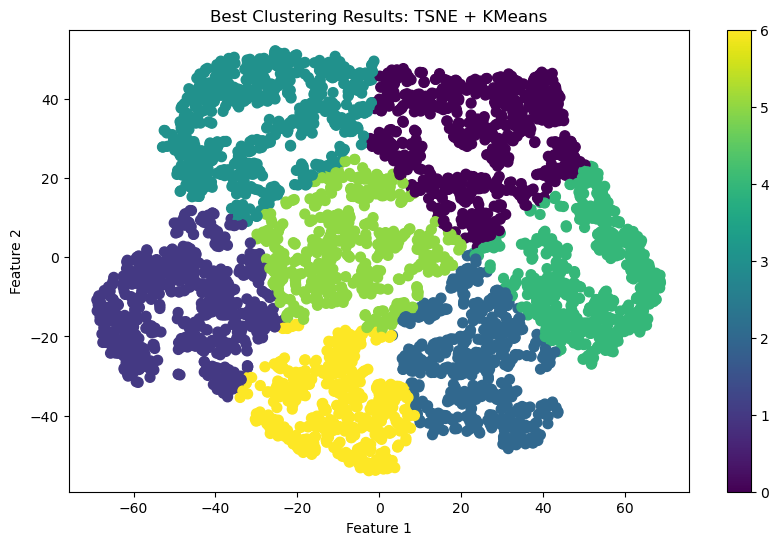

In [25]:
# Plot the best result
print(f'Best Dimensionality Reduction Method: {best_dim_red}')
print(f'Best Clustering Method: {best_clustering}')
model_selector.plot_clusters(best_X_reduced, best_labels, title=f'Best Clustering Results: {best_dim_red} + {best_clustering}')
